In [11]:
%load_ext autoreload
%autoreload 2

from model import LSTMForecast
from data import LitDataModule
import torch
from torch.utils.data import DataLoader
device = 'cuda' if torch.cuda.is_available() else 'cpu'
import tqdm
import numpy as np

import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
CHECKPOINT = '/n/home03/creissel/Seismic/runs/causal/lightning_logs/gdng84yc/checkpoints/epoch=5-step=522.ckpt'

In [13]:
model = LSTMForecast.load_from_checkpoint(CHECKPOINT)
model = model.to(device)
model = model.eval()
dataset = LitDataModule.load_from_checkpoint(CHECKPOINT)

In [14]:
pred = []
true = []
with torch.no_grad():
    for inputs, targets in dataset.test_dataloader():
        true.append(targets)
        inputs = inputs.to(device)
        pred.append(model(inputs).detach().cpu().numpy())

In [18]:
true[0].shape

torch.Size([32, 1])

In [19]:
pred = np.concatenate(pred).flatten()
true = np.concatenate(true).flatten()

In [20]:
pred.shape

(596,)

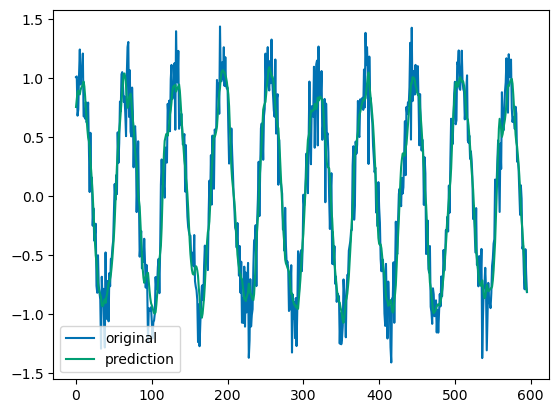

In [22]:
plt.plot(np.arange(0, len(true)), true, label='original', color='#0072B2')
plt.plot(np.arange(0, len(pred)), pred, label='prediction', color='#009E73')
plt.legend()

In [23]:
inputs.shape

torch.Size([20, 30, 1])